# Task 3 : Data Collection in the Wild

# Human Activity Recognition Dataset (Custom Collection)

We collected motion sensor data for **4 participants** performing **6 activities** similar to the UCI HAR dataset:  
- Laying  
- Standing  
- Sitting  
- Walking Upstairs  
- Walking Downstairs  
- Walking  

## Data Collection
- **Tool Used:** Physics Toolbox Suite (Android application)  
- **Sampling Frequency:** 200 Hz  
- **Duration per recording:** 20 seconds  
- **Storage Folder:** `My_Combined`

## Desired Dataset Format
To make our dataset consistent with the UCI HAR specifications, we want:  
- **Sampling Frequency:** 50 Hz  
- **Duration:** 10 seconds  
- **Samples per file:** 500 (50 Hz × 10 sec)

## Preprocessing Steps
1. **Trim** the raw 20-second data to 10 seconds.  
2. **Downsample** from 200 Hz → 50 Hz.  
3. **Save** the processed data.

The preprocessing script takes files from the `My_Combined` folder and outputs the cleaned, downsampled dataset ready for further use


In [10]:
import pandas as pd
import os

def preprocess_data(file_path):
    """
    Loads a CSV file, selects the middle 10 seconds of data, and
    downsamples it from 200 Hz to 50 Hz by taking every 4th sample,
    then adds a new time column based on the 50Hz data.
    """
    try:
        df = pd.read_csv(file_path)
        
        # The data is sampled at 200 Hz
        #trimming the first and last 5 seconds
        start_sample = 5 * 200
        end_sample = 15 * 200
        middle_10_sec_df = df.iloc[start_sample:end_sample].copy()
        
        # Downsample from 200 Hz to 50 Hz by taking every 4th sample (200/50 = 4)
        processed_df = middle_10_sec_df.iloc[::4].reset_index(drop=True)
        # so as instructed in the assignment , we have 50hz sampled data of 10 seconds = 500 samples.
        print(f"File: {os.path.basename(file_path)} - Samples before decimation: {len(middle_10_sec_df)}, Samples after decimation: {len(processed_df)}")

        # time column based on the new 50 Hz sampling rate
        processed_df['time'] = [i / 50 for i in range(len(processed_df))]

        return processed_df
        
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

def process_all_data(input_folder, output_folder):
    """
    Iterates through a directory, preprocesses all CSV files, and
    saves them to a new output directory
    """
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        print(f"Created directory: {output_folder}")


    for root, dirs, files in os.walk(input_folder):
        # Create the corresponding subdirectory in the output folder
        relative_path = os.path.relpath(root, input_folder)
        output_dir = os.path.join(output_folder, relative_path)
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        # Process each CSV file in the current directory
        for file in files:
            if file.endswith('.csv'):
                input_file_path = os.path.join(root, file)
                output_file_path = os.path.join(output_dir, f'processed_{file}')
                
                print(f"Processing {input_file_path}...")
                processed_df = preprocess_data(input_file_path)

                if processed_df is not None:
                    # Save the processed DataFrame to the new location
                    processed_df.to_csv(output_file_path, index=False)
                    print(f"Saved processed data to {output_file_path}")

main_folder = 'My_Combined'
output_folder = 'my_combined_processed'

if os.path.exists(main_folder):
    process_all_data(main_folder, output_folder)
    print("All files processed successfully!")
else:
    print(f"The folder '{main_folder}' was not found. Please make sure the script is in the same directory as your '{main_folder}' folder.")

Created directory: my_combined_processed
Processing My_Combined\LAYING\subject_1_laying.csv...
File: subject_1_laying.csv - Samples before decimation: 2000, Samples after decimation: 500
Saved processed data to my_combined_processed\LAYING\processed_subject_1_laying.csv
Processing My_Combined\LAYING\subject_2_laying.csv...
File: subject_2_laying.csv - Samples before decimation: 2000, Samples after decimation: 500
Saved processed data to my_combined_processed\LAYING\processed_subject_2_laying.csv
Processing My_Combined\LAYING\subject_3_laying.csv...
File: subject_3_laying.csv - Samples before decimation: 2000, Samples after decimation: 500
Saved processed data to my_combined_processed\LAYING\processed_subject_3_laying.csv
Processing My_Combined\LAYING\subject_4_laying.csv...
File: subject_4_laying.csv - Samples before decimation: 2000, Samples after decimation: 500
Saved processed data to my_combined_processed\LAYING\processed_subject_4_laying.csv
Processing My_Combined\SITTING\subject_

above script made a `my_Combined_processed`folder where all the data is cleaned and processed

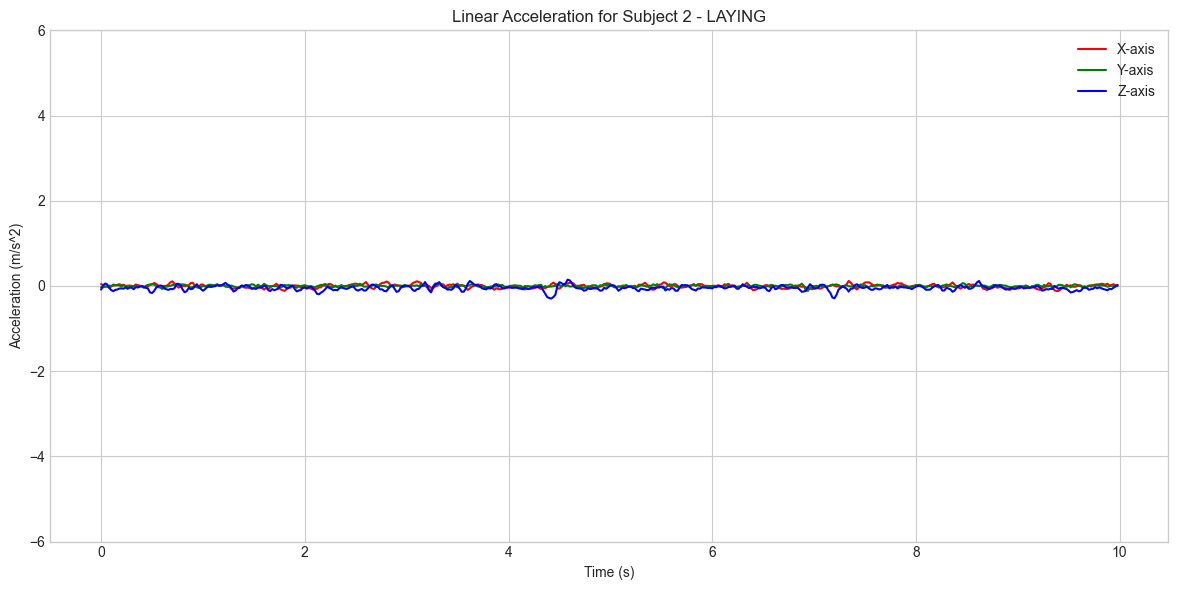

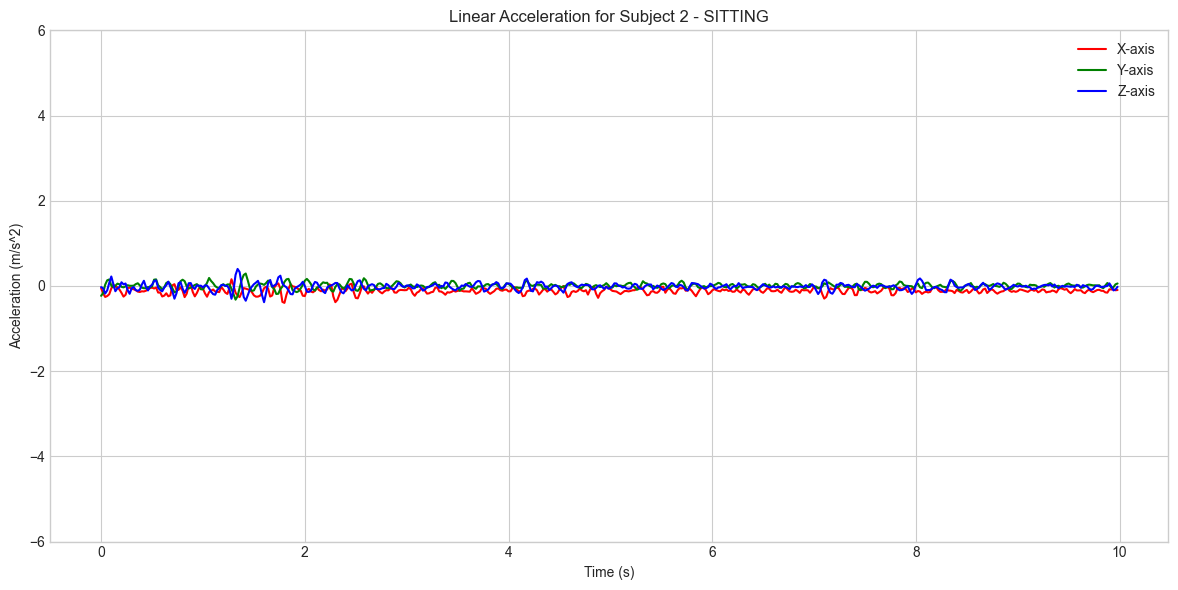

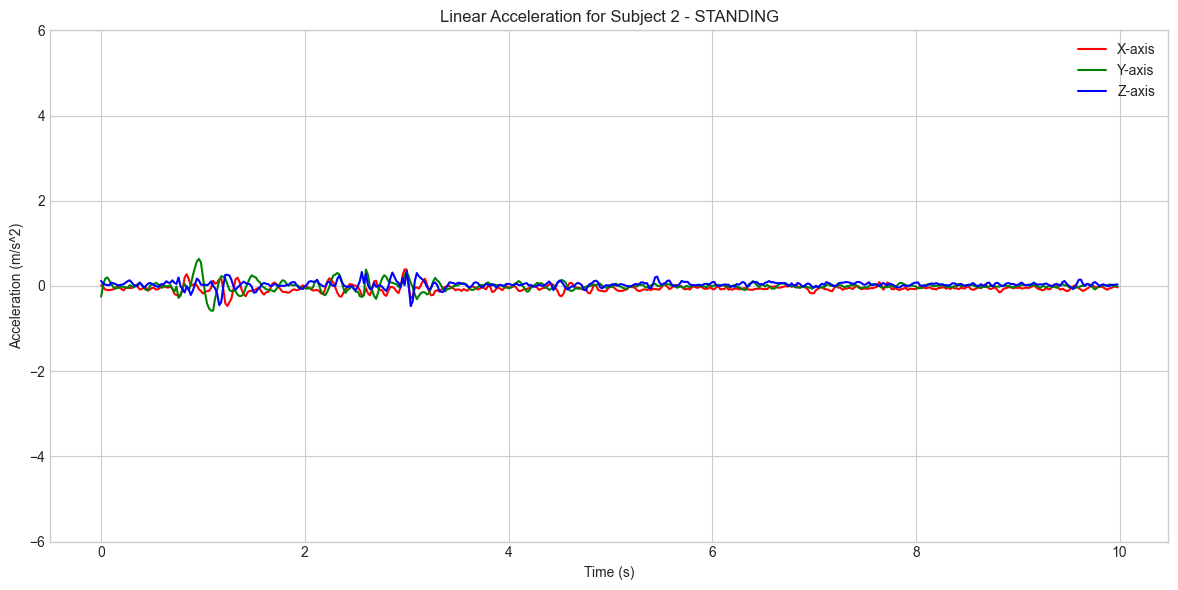

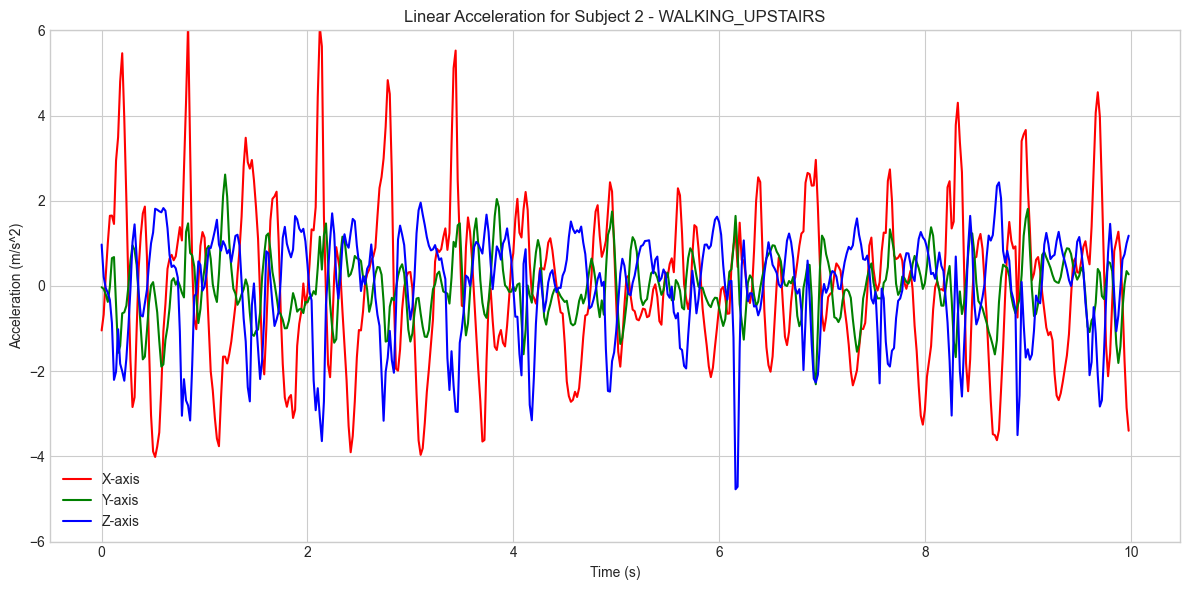

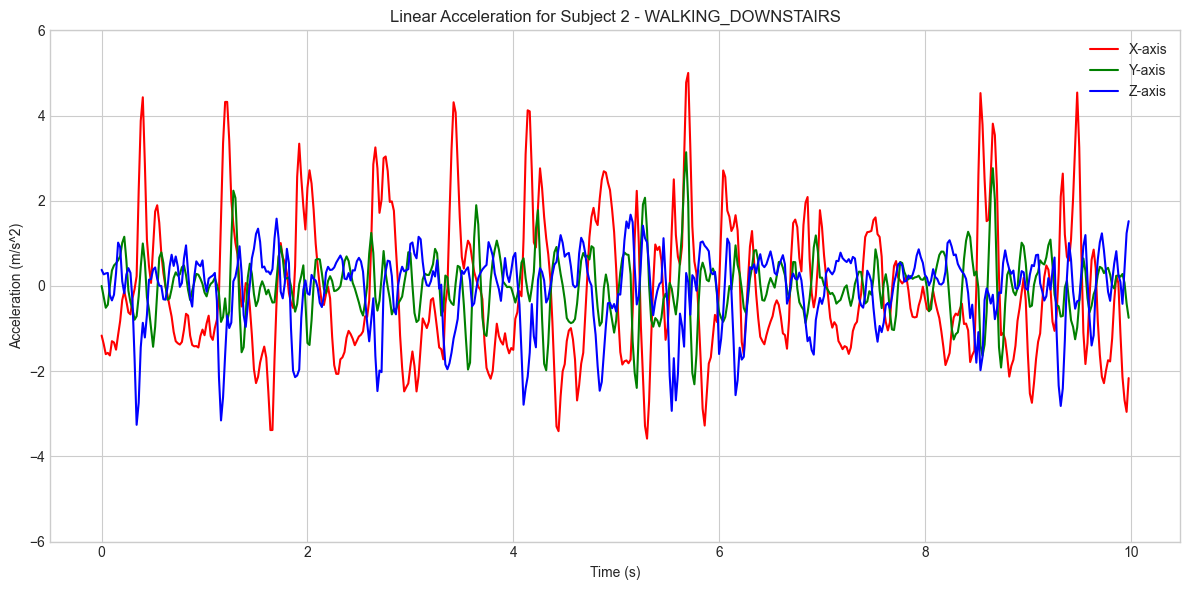

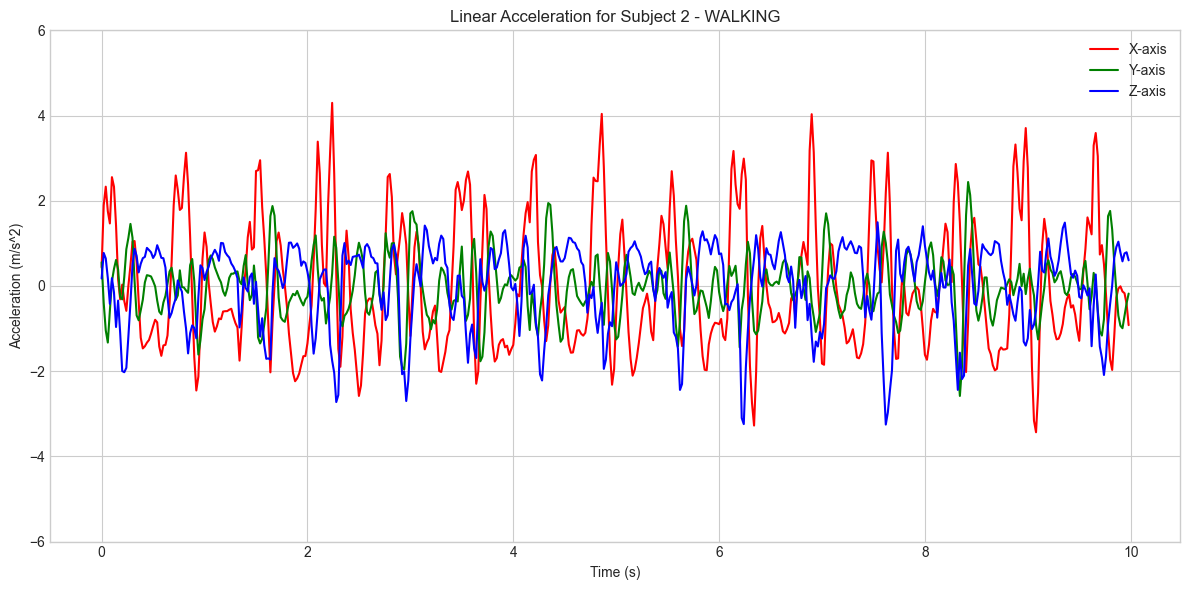

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_subject_data(subject_id, base_dir, activities):
    """
    Plots the linear acceleration data for a specified subject across all activities on a single plot.
    """
    for activity in activities:
        folder_path = os.path.join(base_dir, activity)
        # Assuming the file names follow a pattern like 'processed_subject_2_walking.csv'
        file_name = f'processed_subject_{subject_id}_{activity.lower()}.csv'
        file_path = os.path.join(folder_path, file_name)

        if not os.path.exists(file_path):
            print(f"File not found: {file_path}. Skipping...")
            continue
        
        try:
            df = pd.read_csv(file_path)

           
            plt.figure(figsize=(12, 6))
            
            plt.plot(df['time'], df['ax (m/s^2)'], label='X-axis', color='r')
            plt.plot(df['time'], df['ay (m/s^2)'], label='Y-axis', color='g')
            plt.plot(df['time'], df['az (m/s^2)'], label='Z-axis', color='b')
            
            plt.title(f'Linear Acceleration for Subject {subject_id} - {activity}')
            plt.xlabel('Time (s)')
            plt.ylabel('Acceleration (m/s^2)')
            plt.legend()
            
            plt.tight_layout()
            plt.grid(True)
            
            plt.ylim(-6,6)
            plt.show()

        except Exception as e:
            print(f"An error occurred while plotting {file_name}: {e}")

# Example Usage:
# Define the activities and the base directory where your folders are located
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING']
base_directory = 'my_combined_processed'

plot_subject_data(subject_id=2, base_dir=base_directory, activities=activities)

# Questions

1) Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision, recall and confusion matrix of the model. You have three version of UCI dataset you can use a)Raw data from accelerometer, b)TSFEL featurised data, c)Features provided by author. Choose which version to use, ensuring that your test data is similar to your training data. How did the model perform?

2) Use the data you collected to predict the activities that you performed. Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform?

our collected data only contains the raw accelerometer signals (ax, ay, az), it is not possible to directly use the 561 handcrafted features provided by the UCI-HAR dataset authors, as those include many additional signals like gyroscope and derived angles. In TASK-2 of HAR TASK for the previously tested models, the raw accelerometer data gave relatively poor performance (around 61% accuracy), while TSFEL-based featurization gave much better results (around 89%), showing that TSFEL is effective at extracting meaningful features from accelerometer data alone. Therefore, to ensure consistency between training and testing, the best choice is to train the Decision Tree model on TSFEL features extracted from the UCI-HAR dataset and then apply the same TSFEL featurization process to your collected dataset. This keeps both datasets in the same feature space and avoids mismatches

##### Importing Libraries

In [3]:
import os
import numpy as np
import pandas as pd
import tsfel
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
with open("dt_tsfel.pkl", "rb") as f:
    dt_tsfel = pickle.load(f)

print("Model loaded successfully!")

Model loaded successfully!
